In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./Cr-poisoning.xlsx')

In [3]:
df.head(10)

,log pO2 /bar,log CrO3 /bar,reaction product
0,-1.66,-22.0,SrO
1,-1.66,-18.5,SrCrO4
2,-4.00,-18.5,Sr3Cr2O8
3,-3.70,-17.2,SrCrO4
4,-7.80,-18.5,Sr3Cr2O8
5,-8.10,-17.0,SrCrO3
6,-8.50,-18.0,SrCrO3
7,-9.00,-21.0,SrO
8,-9.50,-21.0,Sr2CrO4
9,-7.50,-19.9,Sr2CrO4


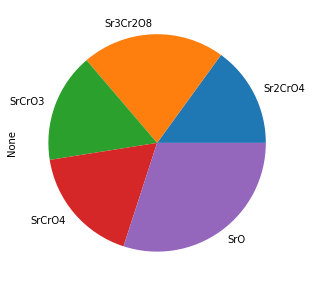

In [4]:
df.groupby(by = 'reaction product').size().plot(kind = 'pie', figsize = (5,5))

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
array_scaler = scaler.fit_transform(df[["log pO2 /bar",'log CrO3 /bar']])
#np.mean(X_train), np.std(X_train)


df_scaler = pd.DataFrame(array_scaler)
df = pd.concat([df_scaler,df['reaction product']],axis=1)

In [6]:
from random import sample
idx = sample(list(df.index), int(df.shape[0] * 0.7))
df_train, df_test = df.ix[idx], df.drop(idx)

/home/pascal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
X_train = np.array(df_train)
X_test = np.array(df_test)
print (np.shape (X_train))
print (np.shape (X_test))

(56, 3)
(24, 3)


In [9]:
df.head()

,0,1,reaction product
0,1.557565,-1.369250,SrO
1,1.557565,-0.035720,SrCrO4
2,0.776090,-0.035720,Sr3Cr2O8
3,0.876279,0.459592,SrCrO4
4,-0.492972,-0.035720,Sr3Cr2O8


/home/pascal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pascal/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pascal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


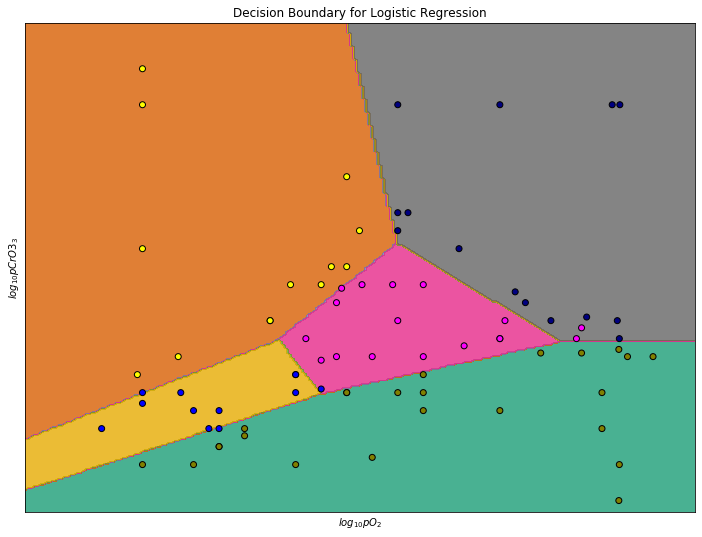

In [22]:
from sklearn import linear_model
import itertools
h = .02  # step size in the mesh

X = np.array(df)

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train[:, :2], np.array(X_train[:, 2:], dtype = np.str))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# pd.set_option('display.max_columns', None)#显示pandas完整数据
# pd.set_option('display.max_rows', None)
#print (pd.DataFrame(Z))


# Put the result into a color plot
encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('Dark2'), alpha=0.8)
# Plot also the training points
#col_map = {'SrO': 'olive', 'SrCrO3': 'navy', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"white",'SrCrO4':"yellow"}
#plt.scatter(X_train[:, 0], X_train[:, 1], c= [col_map[lb] for lb in df["reaction product"].ix[idx]], edgecolors='k', cmap=plt.cm.Paired)
col_map = {'SrO': 'olive', 'SrCrO3': 'yellow', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"navy"}
plt.scatter(X[:,0], X[:,1], c= [col_map[lb] for lb in df['reaction product']], edgecolors='k', cmap=plt.cm.Paired)
plt.ylabel('$log_{10}pCrO3_3$')
plt.xlabel('$log_{10}pO_2$')
plt.title("Decision Boundary for Logistic Regression")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.savefig('classification_LogReg.png')
plt.show()

In [23]:
y_prediction=logreg.predict(X_test[:, :2])

In [24]:
from sklearn.metrics import accuracy_score
print("Test data accuracy of logistic regression: %s%%" % (100*accuracy_score(y_prediction,X_test[:, 2:])))

Test data accuracy of logistic regression: 91.66666666666666%


In [25]:
y_prediction

array(['SrO', 'SrO', 'SrCrO4', 'Sr3Cr2O8', 'Sr3Cr2O8', 'SrO', 'SrCrO3',
       'SrCrO4', 'Sr3Cr2O8', 'Sr3Cr2O8', 'SrCrO4', 'SrCrO4', 'SrCrO3',
       'SrO', 'SrO', 'Sr2CrO4', 'SrCrO4', 'Sr2CrO4', 'Sr3Cr2O8', 'SrO',
       'SrO', 'Sr2CrO4', 'SrO', 'SrO'], dtype='<U8')

In [31]:
X_test[:, 2:]

array([['SrO'],
       ['SrO'],
       ['SrCrO4'],
       ['Sr3Cr2O8'],
       ['Sr3Cr2O8'],
       ['SrO'],
       ['Sr3Cr2O8'],
       ['SrCrO4'],
       ['Sr3Cr2O8'],
       ['Sr3Cr2O8'],
       ['Sr3Cr2O8'],
       ['SrCrO4'],
       ['SrCrO3'],
       ['SrO'],
       ['SrO'],
       ['Sr2CrO4'],
       ['SrCrO4'],
       ['Sr2CrO4'],
       ['Sr3Cr2O8'],
       ['SrO'],
       ['SrO'],
       ['Sr2CrO4'],
       ['SrO'],
       ['SrO']], dtype=object)

In [32]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10, 7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [33]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(np.array(df_test['reaction product']), y_prediction)

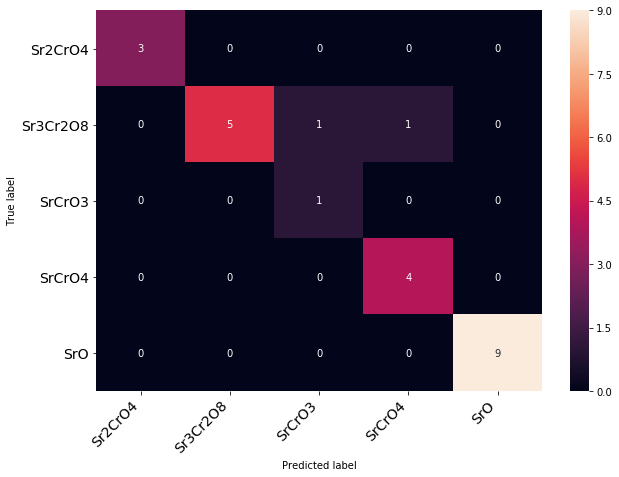

In [35]:
import seaborn as sns
print_confusion_matrix(confusion_mat, ['Sr2CrO4','Sr3Cr2O8', 'SrCrO3', 'SrCrO4', 'SrO'])
plt.savefig("confusion_matrix_LogReg.png")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('Cr-poisoning.xlsx')
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]

le = LabelEncoder()
y = le.fit_transform(y.values)
print(le.classes_)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

In [ ]:
clf = SVC(kernel='linear', gamma=0.5, C=20)
# knn = KNeighborsClassifier(n_neighbors=4)
# rf = RandomForestClassifier()
log_reg = LogisticRegression()
model = clf
model.fit(X_train, y_train)
#
y_hat = model.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_hat)
print(confusion_mat)
# print(classification_report(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

In [ ]:
print_confusion_matrix(confusion_mat, ['Sr2CrO4','Sr3Cr2O8', 'SrCrO3', 'SrCrO4', 'SrO'])

In [ ]:
def plot_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def print_confusion_matrix(confusion_matrix, class_names, figsize=(10, 7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig


In [ ]:
print_confusion_matrix(confusion_mat, ["1", "2", "3", "4", "5"])

fig, ax = plt.subplots()
title = 'Decision Boundary'
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)